<img src="clean.png" width="600">

<h2 style='color:#242846; text-align:center'>Limpieza de dataset de bienes raices  </h2>


<h3 Style = "color:#424665 ">1. carga y estandarizacion de los set de datos</h3>


   <h4 Style = "color:#4f5b53"> 1.1 Importacion de librerias </h4>    


In [1]:
import pandas as pd #se usa para el manejo de dataframe
import numpy as np #se usa para manejo de estructura datos(lista,tuplas)
import matplotlib.pyplot as plt #se usa para crear graficos 
import matplotlib as mpl #Se usa para configurar las graficas.

In [2]:
df_raices = pd.read_csv("dataset.csv", sep=';') 

C:\Users\jesus\AppData\Local\Temp\ipykernel_42228\1412488534.py:1: DtypeWarning: Columns (5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raices = pd.read_csv("dataset.csv", sep=';')


In [3]:
df_raices.shape

(200015, 26)

In [4]:
df_raices.columns


Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
df_raices.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2020348.0,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.463,Commercial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20002.0,2020.0,10/2/20,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.5883,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200212.0,2020.0,3/9/21,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.7248,Residential,Condo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200243.0,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.00,890000.00,0.6958,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200377.0,2020.0,7/2/21,Avon,70 FAR HILLS DRIVE,862330.00,1447500.00,0.5957,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   <h4 Style = "color:#4f5b53"> 1.1 Revison de encabezados </h4>   


In [6]:
df_raices.rename({'Serial Number': 'serialNumber'}, axis=1, inplace=True)
df_raices.rename({'List Year': 'listYear'}, axis=1, inplace=True)
df_raices.rename({'Date Recorded': 'dateRecorded'}, axis=1, inplace=True)
df_raices.rename({'Town': 'town'}, axis=1, inplace=True)
df_raices.rename({'Address': 'address'}, axis=1, inplace=True)
df_raices.rename({'Assessed Value': 'assessedValue'}, axis=1, inplace=True)
df_raices.rename({'Sale Amount': 'saleAmount'}, axis=1, inplace=True)
df_raices.rename({'Sales Ratio': 'salesRatio'}, axis=1, inplace=True)
df_raices.rename({'Property Type': 'propertyType'}, axis=1, inplace=True)
df_raices.rename({'Residential Type': 'residentialType'}, axis=1, inplace=True)
df_raices.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

<h2 Style = "color:#424665  ">2. Manejo de valores faltantes</h2>


In [7]:
df_raices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200015 entries, 0 to 200014
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serialNumber      200013 non-null  float64
 1   listYear          200013 non-null  float64
 2   dateRecorded      200011 non-null  object 
 3   town              200013 non-null  object 
 4   address           200009 non-null  object 
 5   assessedValue     200013 non-null  object 
 6   saleAmount        200011 non-null  object 
 7   salesRatio        200011 non-null  object 
 8   propertyType      66804 non-null   object 
 9   residentialType   61013 non-null   object 
 10  Non Use Code      45783 non-null   object 
 11  Assessor Remarks  14350 non-null   object 
 12  OPM remarks       2895 non-null    object 
 13  Location          57095 non-null   object 
 14  Unnamed: 14       485 non-null     object 
 15  Unnamed: 15       185 non-null     object 
 16  Unnamed: 16       65

In [8]:
dfTemp = df_raices.isnull()
dfTemp.sum()

serialNumber             2
listYear                 2
dateRecorded             4
town                     2
address                  6
assessedValue            2
saleAmount               4
salesRatio               4
propertyType        133211
residentialType     139002
Non Use Code        154232
Assessor Remarks    185665
OPM remarks         197120
Location            142920
Unnamed: 14         199530
Unnamed: 15         199830
Unnamed: 16         199950
Unnamed: 17         199985
Unnamed: 18         199997
Unnamed: 19         199998
Unnamed: 20         200000
Unnamed: 21         200001
Unnamed: 22         200001
Unnamed: 23         200002
Unnamed: 24         200014
Unnamed: 25         200011
dtype: int64

<h4 Style = "color:#4f5b53"> 2.3 Imputacion simple de valores numericos </h4> 

In [9]:
dfTemp = df_raices.isnull()
for columna in dfTemp.columns.values.tolist():
    print(columna)
    print(dfTemp[columna].value_counts())
    print("")

serialNumber
False    200013
True          2
Name: serialNumber, dtype: int64

listYear
False    200013
True          2
Name: listYear, dtype: int64

dateRecorded
False    200011
True          4
Name: dateRecorded, dtype: int64

town
False    200013
True          2
Name: town, dtype: int64

address
False    200009
True          6
Name: address, dtype: int64

assessedValue
False    200013
True          2
Name: assessedValue, dtype: int64

saleAmount
False    200011
True          4
Name: saleAmount, dtype: int64

salesRatio
False    200011
True          4
Name: salesRatio, dtype: int64

propertyType
True     133211
False     66804
Name: propertyType, dtype: int64

residentialType
True     139002
False     61013
Name: residentialType, dtype: int64

Non Use Code
True     154232
False     45783
Name: Non Use Code, dtype: int64

Assessor Remarks
True     185665
False     14350
Name: Assessor Remarks, dtype: int64

OPM remarks
True     197120
False      2895
Name: OPM remarks, dtype: int64

L

In [10]:
df_raices["serialNumber"]= df_raices["serialNumber"].fillna(df_raices["serialNumber"].mean()) #borrar valores faltantes con mediana
df_raices["listYear"]= df_raices["listYear"].fillna(df_raices["listYear"].mean())

In [11]:
df_raices['saleAmount'] = pd.to_numeric(df_raices['saleAmount'], errors='coerce')
df_raices['salesRatio'] = pd.to_numeric(df_raices['salesRatio'], errors='coerce')
df_raices['assessedValue'] = pd.to_numeric(df_raices['salesRatio'], errors='coerce')



promNormalizadas = df_raices["saleAmount"].astype("float").mean(axis=0)
df_raices["saleAmount"].replace(np.nan,promNormalizadas,inplace=True)
promNormalizadas = df_raices["salesRatio"].astype("float").mean(axis=0)
df_raices["salesRatio"].replace(np.nan,promNormalizadas,inplace=True)
promNormalizadas = df_raices["assessedValue"].astype("float").mean(axis=0)
df_raices["assessedValue"].replace(np.nan,promNormalizadas,inplace=True)

df_raices.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2020348.0,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,0.4630,325000.0,0.4630,Commercial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20002.0,2020.0,10/2/20,Ashford,390 TURNPIKE RD,0.5883,430000.0,0.5883,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200212.0,2020.0,3/9/21,Avon,5 CHESTNUT DRIVE,0.7248,179900.0,0.7248,Residential,Condo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200243.0,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,0.6958,890000.0,0.6958,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200377.0,2020.0,7/2/21,Avon,70 FAR HILLS DRIVE,0.5957,1447500.0,0.5957,Residential,Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 Style = "color:#4f5b53"> 2.4 Imputacion simple de valores categoricos </h4> 

In [12]:
df_raices["residentialType"].value_counts().idxmax
df_raices["residentialType"].replace(np.nan,'Single Family ',inplace=True)

In [13]:
df_raices["propertyType"].value_counts().idxmax
df_raices["propertyType"].replace(np.nan,'Residential',inplace=True)


In [14]:
select = df_raices['propertyType'].str.match(r'^[a-zA-Z\s]+$')
df_raices = df_raices[select]

<h4 Style = "color:#4f5b53"> 2.5 Eliminar filas o columnas con valores faltantes </h4> 

In [15]:
df_raices.dropna(subset=["town", "dateRecorded", "address"], axis=0,inplace=True)
df_raices.reset_index(drop=True,inplace=True)

In [16]:
df_raices.columns


Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [17]:
df_raices.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',

       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',

       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Location','Non Use Code','Assessor Remarks','OPM remarks'], axis=1,inplace=True)

df_raices.reset_index(drop=True,inplace=True)

In [18]:
df_raices.shape

(199877, 10)

In [19]:
dfTemp = df_raices.isnull()
for columna in dfTemp.columns.values.tolist():
    print(columna)
    print(dfTemp[columna].value_counts())
    print("")

serialNumber
False    199877
Name: serialNumber, dtype: int64

listYear
False    199877
Name: listYear, dtype: int64

dateRecorded
False    199877
Name: dateRecorded, dtype: int64

town
False    199877
Name: town, dtype: int64

address
False    199877
Name: address, dtype: int64

assessedValue
False    199877
Name: assessedValue, dtype: int64

saleAmount
False    199877
Name: saleAmount, dtype: int64

salesRatio
False    199877
Name: salesRatio, dtype: int64

propertyType
False    199877
Name: propertyType, dtype: int64

residentialType
False    199877
Name: residentialType, dtype: int64



In [20]:
dfTemp = df_raices.isnull()
dfTemp.sum()

serialNumber       0
listYear           0
dateRecorded       0
town               0
address            0
assessedValue      0
saleAmount         0
salesRatio         0
propertyType       0
residentialType    0
dtype: int64

<h2 Style = "color:#424665 ">3. Estandarizacion de Datos</h2>

In [21]:
df_raices["serialNumber"]= df_raices["serialNumber"].astype("int")
df_raices["listYear"]= df_raices["listYear"].astype("int")
df_raices["salesRatio"]= df_raices["salesRatio"].astype("int")

In [22]:
df_raices["residential/saleAmount(norm)"] = df_raices.groupby("residentialType")["saleAmount"].transform("mean")
df_raices["town/resi.saleamount(norm)"] = df_raices.groupby("town")["residential/saleAmount(norm)"].transform("mean")


In [23]:
df_raices.dtypes

serialNumber                      int32
listYear                          int32
dateRecorded                     object
town                             object
address                          object
assessedValue                   float64
saleAmount                      float64
salesRatio                        int32
propertyType                     object
residentialType                  object
residential/saleAmount(norm)    float64
town/resi.saleamount(norm)      float64
dtype: object

<h4 Style = "color:#4f5b53">  formato de visualización </h4> 

In [24]:
pd.options.display.float_format = '${:,.2f}'.format
df_raices

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,residential/saleAmount(norm),town/resi.saleamount(norm)
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,$0.46,"$325,000.00",0,Commercial,Single Family,"$352,711.39","$380,691.24"
1,20002,2020,10/2/20,Ashford,390 TURNPIKE RD,$0.59,"$430,000.00",0,Residential,Single Family,"$514,797.42","$389,142.72"
2,200212,2020,3/9/21,Avon,5 CHESTNUT DRIVE,$0.72,"$179,900.00",0,Residential,Condo,"$416,417.66","$390,135.04"
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,$0.70,"$890,000.00",0,Residential,Single Family,"$514,797.42","$390,135.04"
4,200377,2020,7/2/21,Avon,70 FAR HILLS DRIVE,$0.60,"$1,447,500.00",0,Residential,Single Family,"$514,797.42","$390,135.04"
...,...,...,...,...,...,...,...,...,...,...,...,...
199872,20763,2002,06/17/2003,West Haven,130 JONES ST,$0.39,"$179,000.00",0,Residential,Single Family,"$352,711.39","$352,869.23"
199873,21066,2002,07/22/2003,West Hartford,15 PORTER DR,$0.47,"$515,000.00",0,Residential,Single Family,"$352,711.39","$398,076.80"
199874,30531,2003,04/15/2004,East Hartford,43 TIFFANY RD,$0.62,"$130,000.00",0,Residential,Single Family,"$352,711.39","$396,965.69"
199875,30624,2003,3/3/04,Bristol,81 ANDREWS ST,$0.53,"$130,000.00",0,Residential,Single Family,"$352,711.39","$391,877.08"


<h2 style="color: #6495ED">6. Visualización de Datos</h2>

In [25]:
#Remueve las lineas de los axis.

mpl.rcParams["axes.spines.bottom"] = True

mpl.rcParams["axes.spines.left"] = False

mpl.rcParams["axes.spines.right"] = False

mpl.rcParams["axes.spines.top"] = False

<h5 style="color: #005f82"> Preguntas del dataset</h5>

<h3 style="color: #005f82"> 1. ¿Cuál es el ingreso anual de las propiedades vendidas?</h3>

In [26]:
df_raices.groupby(['listYear', 'propertyType'])['saleAmount'].sum().count

<bound method Series.count of listYear  propertyType  
2001      Residential      $14,671,503,335.00
2002      Residential      $17,100,395,037.00
2003      Residential       $5,583,694,049.00
2004      Residential             $381,000.00
2005      Residential          $22,689,557.00
2006      Condo                 $6,928,400.00
          Residential          $56,666,775.00
          Two Family              $110,000.00
2007      Condo                $10,271,915.00
          Residential          $22,807,521.00
2008      Condo                 $2,256,675.00
          Residential          $20,845,964.00
2009      Condo                 $4,001,640.00
          Residential          $25,596,387.00
2010      Condo                 $5,420,470.00
          Residential          $39,602,150.00
2011      Condo                 $2,872,450.00
          Residential          $27,764,500.00
2012      Condo                 $4,458,995.00
          Residential          $35,161,372.00
2013      Condo          

<h3 style="color: #005f82">  2. ¿Qué tipo de propiedad tiene mayor facilidad de venta?
</h3>

In [27]:
bf=df_raices.groupby(["propertyType"]).count()
bf=bf.iloc[:8]
bf=bf.sort_values("salesRatio", ascending= False)
bf

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,residentialType,residential/saleAmount(norm),town/resi.saleamount(norm)
propertyType,,,,,,,,,,,
Residential,193711,193711,193711,193711,193711,193711,193711,193711,193711,193711,193711
Commercial,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951
Apartments,478,478,478,478,478,478,478,478,478,478,478
Condo,371,371,371,371,371,371,371,371,371,371,371
Industrial,225,225,225,225,225,225,225,225,225,225,225
Public Utility,5,5,5,5,5,5,5,5,5,5,5
Single Family,2,2,2,2,2,2,2,2,2,2,2
Three Family,1,1,1,1,1,1,1,1,1,1,1


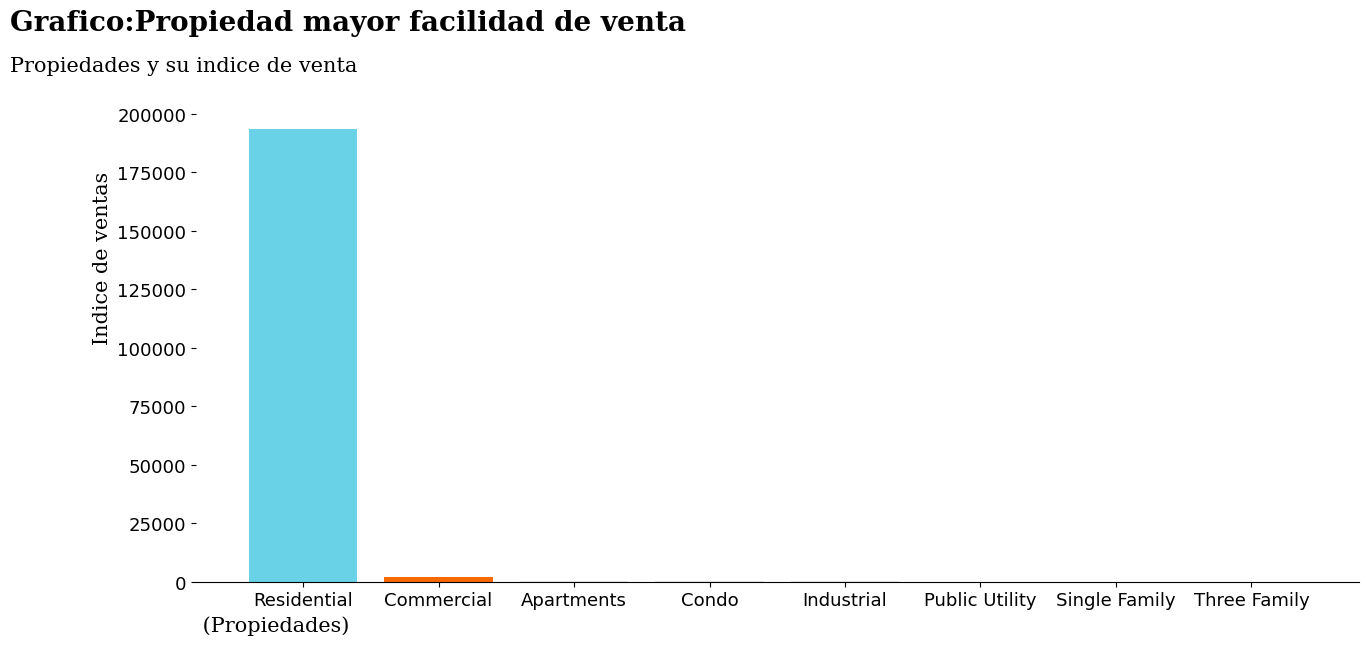

In [62]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

eje_x = bf.index.tolist()
data = bf["salesRatio"].tolist()

bar_colors = ['#69d2e7','#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']



ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:Propiedad mayor facilidad de venta"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Propiedades y su indice de venta"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (Propiedades)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Indice de ventas"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 13)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h3 style="color: #005f82"> 3. ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de 
propiedades? Y ¿Qué elementos particulares tienen esas ciudades o 
pueblos?</h3>

In [29]:
tf= df_raices.groupby(["town"]).count()
tf= tf.iloc[:8]
tf=tf.sort_values("saleAmount", ascending= False)
tf

,serialNumber,listYear,dateRecorded,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,residential/saleAmount(norm),town/resi.saleamount(norm)
town,,,,,,,,,,,
Avon,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749
Berlin,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
Ansonia,938,938,938,938,938,938,938,938,938,938,938
Bethany,533,533,533,533,533,533,533,533,533,533,533
Beacon Falls,416,416,416,416,416,416,416,416,416,416,416
Ashford,311,311,311,311,311,311,311,311,311,311,311
Barkhamsted,277,277,277,277,277,277,277,277,277,277,277
Andover,189,189,189,189,189,189,189,189,189,189,189


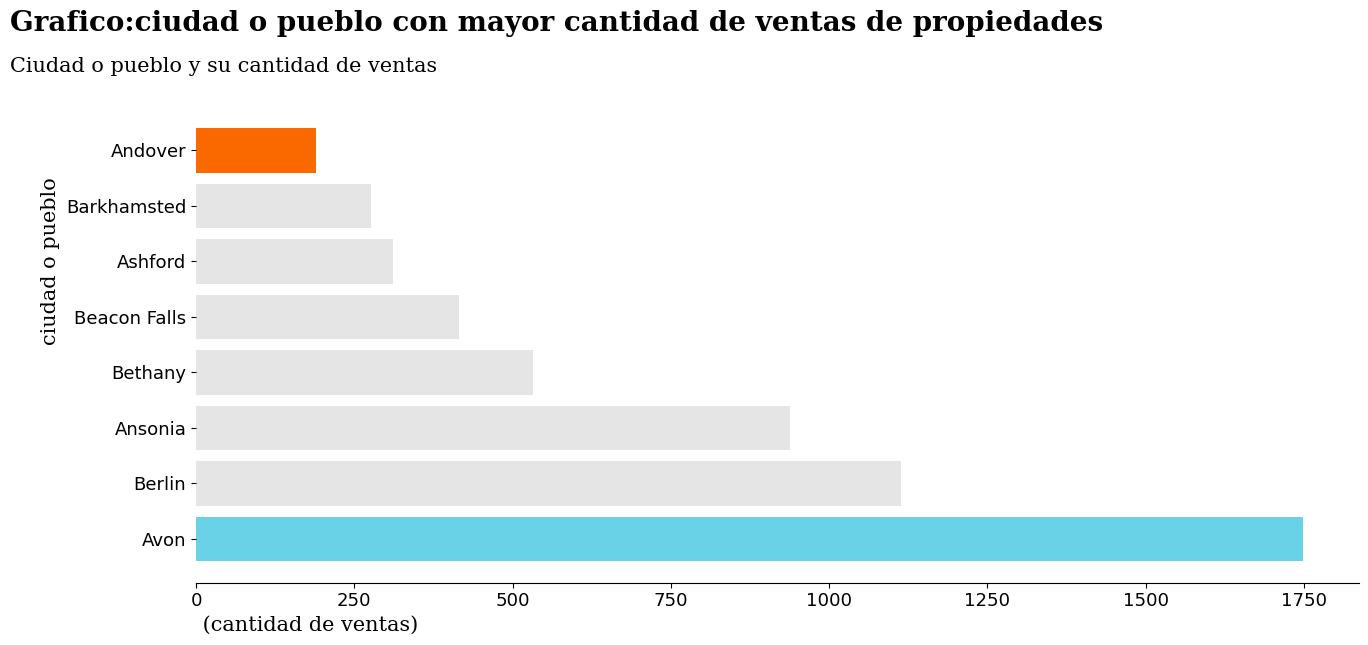

In [30]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

eje_x=tf.index.tolist()
data=tf["saleAmount"].tolist()

bar_colors = ['#69d2e7','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#fa6900']



ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:ciudad o pueblo con mayor cantidad de ventas de propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Ciudad o pueblo y su cantidad de ventas"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (cantidad de ventas)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "ciudad o pueblo"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 13)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h3 style="color: #005f82"> 4. ¿Cuál es el costo promedio de las propiedades residenciales y 
comerciales?
</h3>

In [31]:
df_raices.groupby(['propertyType'])['saleAmount'].mean()

propertyType
Apartments       $12,906,060.19
Commercial        $1,771,751.58
Condo               $233,824.09
Industrial        $1,831,100.99
Public Utility      $369,708.80
Residential         $346,270.89
Single Family       $265,000.00
Three Family         $50,000.00
Two Family          $197,500.00
Vacant Land         $295,713.86
Name: saleAmount, dtype: float64

In [32]:
type = df_raices.groupby(['propertyType'])['saleAmount'].mean()
resident = type['Residential']
comercia = type ['Commercial']

 
print("promedio residential:", "${:,.2f}".format(resident))
print("promedio commercial:", "${:,.2f}".format(comercia))


promedio residential: $346,270.89
promedio commercial: $1,771,751.58


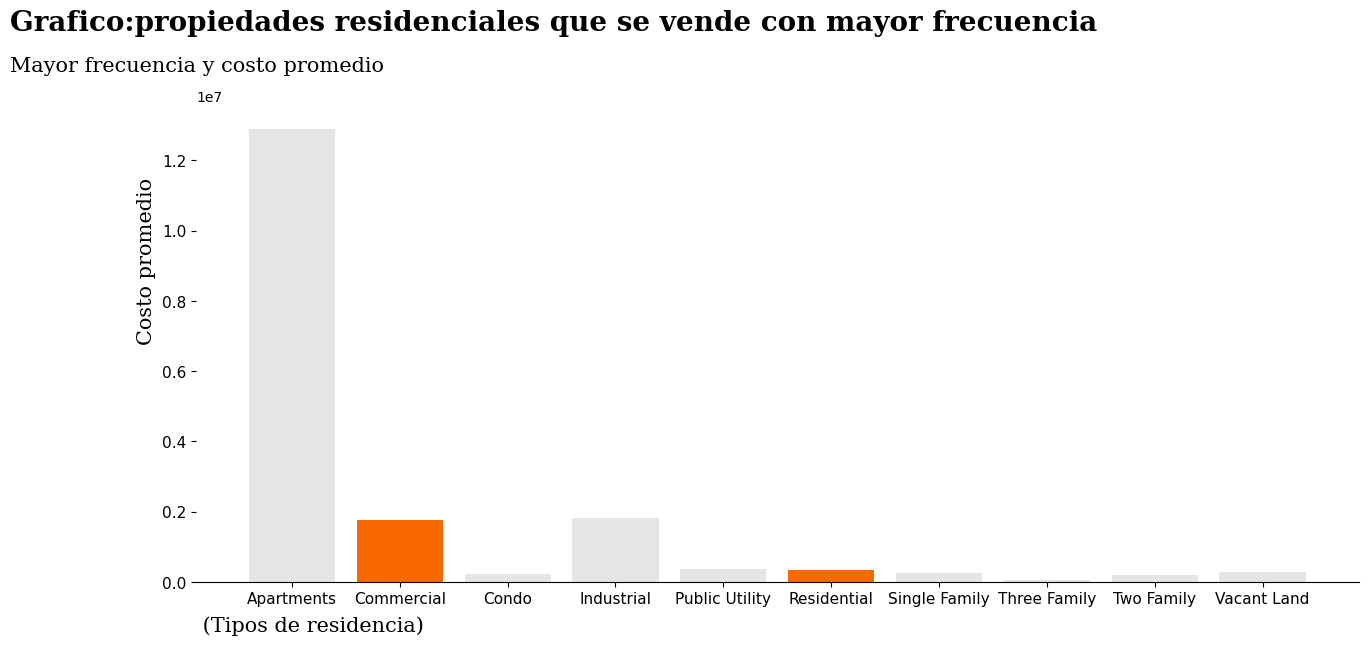

In [67]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

result = df_raices.groupby(['propertyType'])['saleAmount'].mean().reset_index()
primeros_10 = result[:10]

eje_x = primeros_10['propertyType'].tolist()

data = primeros_10['saleAmount'].tolist()

bar_colors = ['#e5e5e5','#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']



ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:propiedades residenciales que se vende con mayor frecuencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Mayor frecuencia y costo promedio"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (Tipos de residencia)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Costo promedio"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 11)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h3 style="color: #005f82"> 5. ¿Cuál es tipo de propiedades residenciales que se vende con mayor 
frecuencia, donde y con que costo promedio?</h3>

In [33]:
df_raices.groupby(['residentialType'])['town/resi.saleamount(norm)'].mean()


residentialType
Condo            $396,590.29
Four Family      $400,193.91
Single Family    $401,924.60
Single Family    $386,779.13
Three Family     $396,286.36
Two Family       $394,349.00
Name: town/resi.saleamount(norm), dtype: float64

In [44]:
tf= df_raices.groupby(["residentialType"]).count()
tf=tf.sort_values("town/resi.saleamount(norm)", ascending= False)
tf

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residential/saleAmount(norm),town/resi.saleamount(norm)
residentialType,,,,,,,,,,,
Single Family,138995,138995,138995,138995,138995,138995,138995,138995,138995,138995,138995
Single Family,43267,43267,43267,43267,43267,43267,43267,43267,43267,43267,43267
Condo,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661
Two Family,3199,3199,3199,3199,3199,3199,3199,3199,3199,3199,3199
Three Family,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488
Four Family,267,267,267,267,267,267,267,267,267,267,267


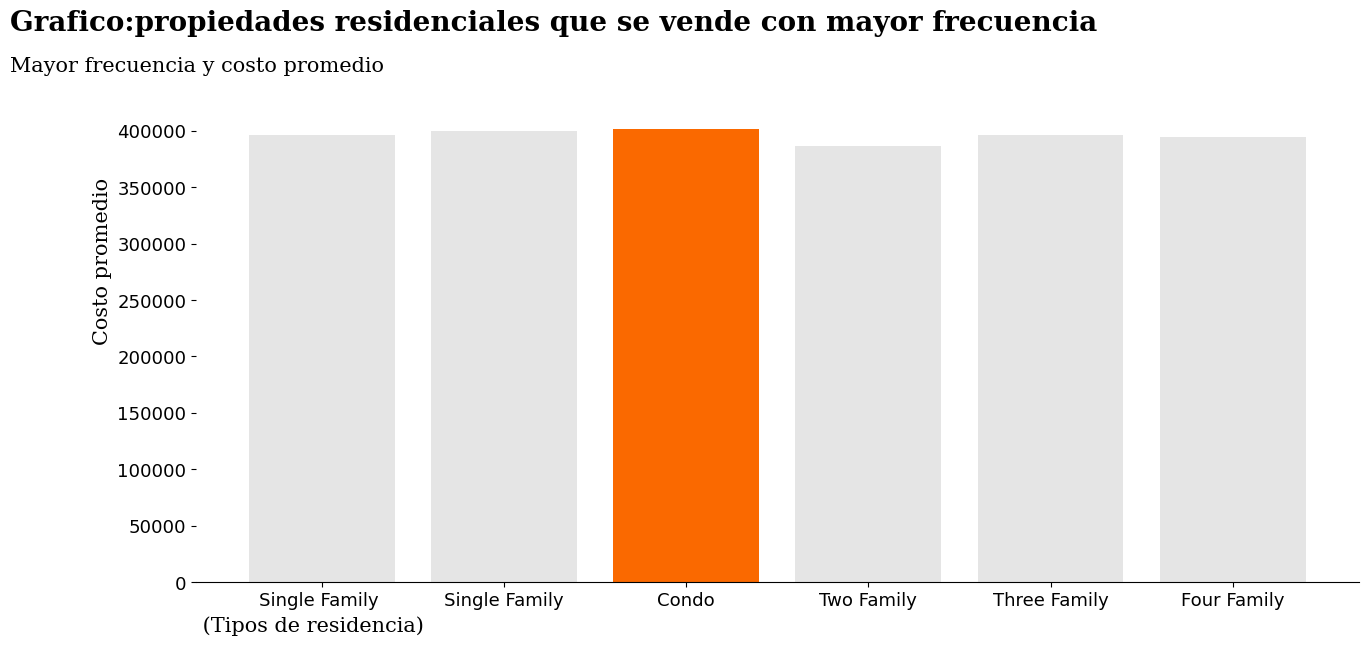

In [45]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

eje_x=tf.index.tolist()
data= df_raices.groupby(['residentialType'])['town/resi.saleamount(norm)'].mean()

bar_colors = ['#e5e5e5','#e5e5e5','#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']



ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:propiedades residenciales que se vende con mayor frecuencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Mayor frecuencia y costo promedio"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (Tipos de residencia)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Costo promedio"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 13)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

In [38]:
df_raices.groupby(['town'])['residential/saleAmount(norm)'].mean()

town
Andover         $405,024.87
Ansonia         $380,691.24
Ashford         $389,142.72
Avon            $390,135.04
Barkhamsted     $395,427.20
                    ...    
Windsor Locks   $394,490.71
Wolcott         $435,490.32
Woodbridge      $399,706.82
Woodbury        $396,415.82
Woodstock       $389,676.55
Name: residential/saleAmount(norm), Length: 169, dtype: float64

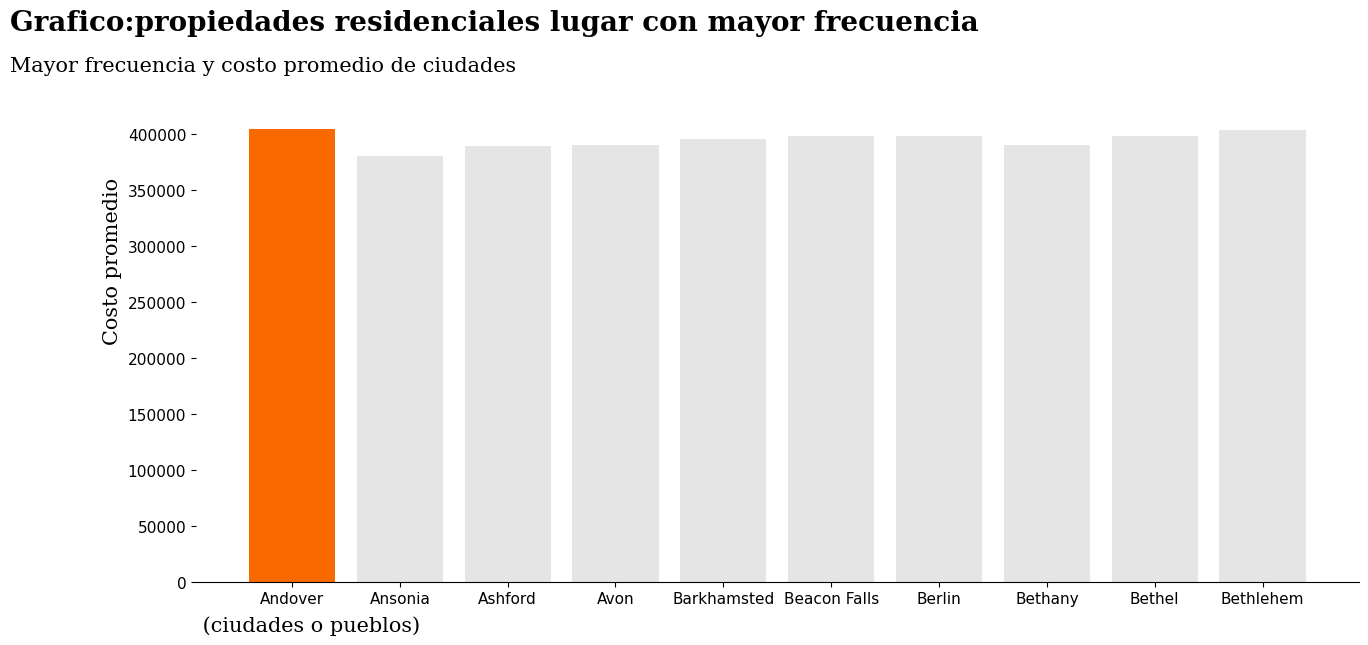

In [59]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

result = df_raices.groupby(['town'])['residential/saleAmount(norm)'].mean().reset_index()
primeros_10 = result[:10]

eje_x = primeros_10['town'].tolist()

data = primeros_10['residential/saleAmount(norm)'].tolist()

bar_colors = ['#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']



ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico:propiedades residenciales lugar con mayor frecuencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.94,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "Mayor frecuencia y costo promedio de ciudades"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = " (ciudades o pueblos)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Costo promedio"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 15,

              fontweight = "regular",

              fontfamily = "serif")


 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 11)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h3 style="color: #005f82"> 6. ¿Cuál es margen promedio de ganancia por cada una de las 
propiedades vendidas?</h3>

In [ ]:
df_raices.groupby(["propertyType"])['salesRatio'].mean()

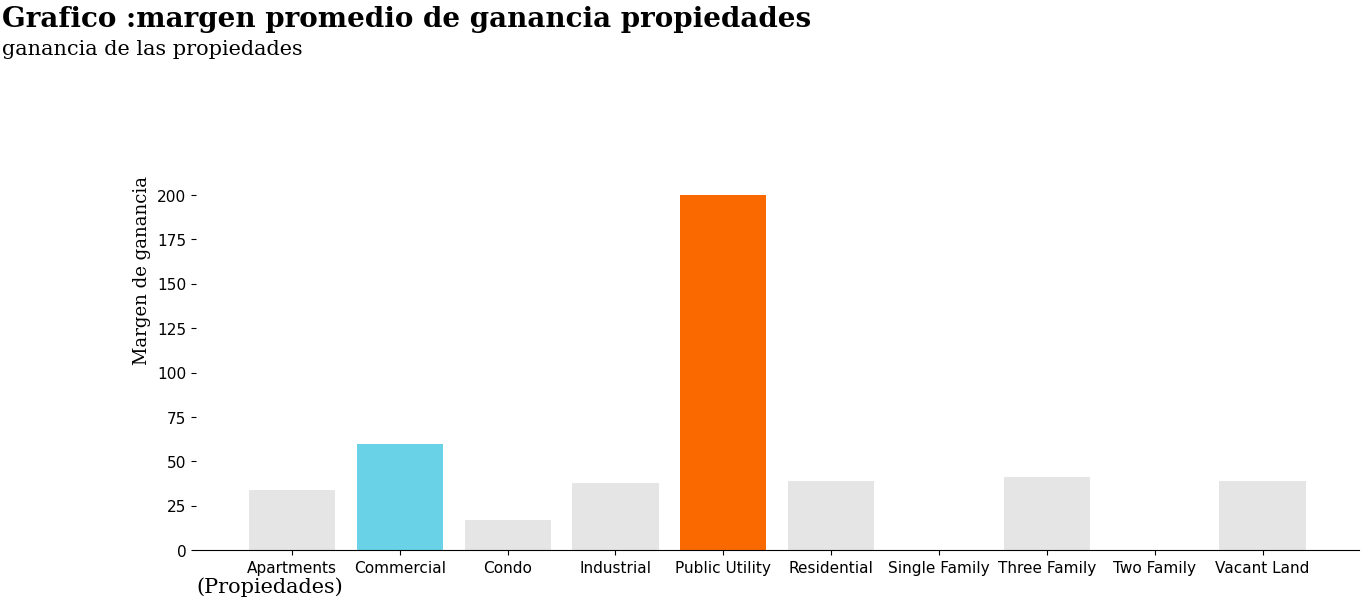

In [43]:
ig, ax = plt.subplots(1,1, figsize =(15,5.4), dpi=100)

data = df_raices.groupby(['propertyType'])['salesRatio'].mean()
eje_x = data.index.tolist()


 

bar_colors = ['#e5e5e5','#69d2e7','#e5e5e5','#e5e5e5','#fa6900','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5']

 

ax.bar(eje_x, data, color=bar_colors)



#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico :margen promedio de ganancia propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
,
             #fontname = "Liberation Sans Narrow"

#FORMATO DEL SUBTITULO
subTitle = "ganancia de las propiedades"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO AL EJE (X/Y)
etiqueta = "(Propiedades)"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 15,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Margen de ganancia"

ax.set_ylabel(etiquetay,

              ha = 'left',

              fontsize = 13,

              fontweight = "regular",

              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 11)

   

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

plt.show()

fin del proyecto